In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (13, 13)
sns.set(font_scale=2)
print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

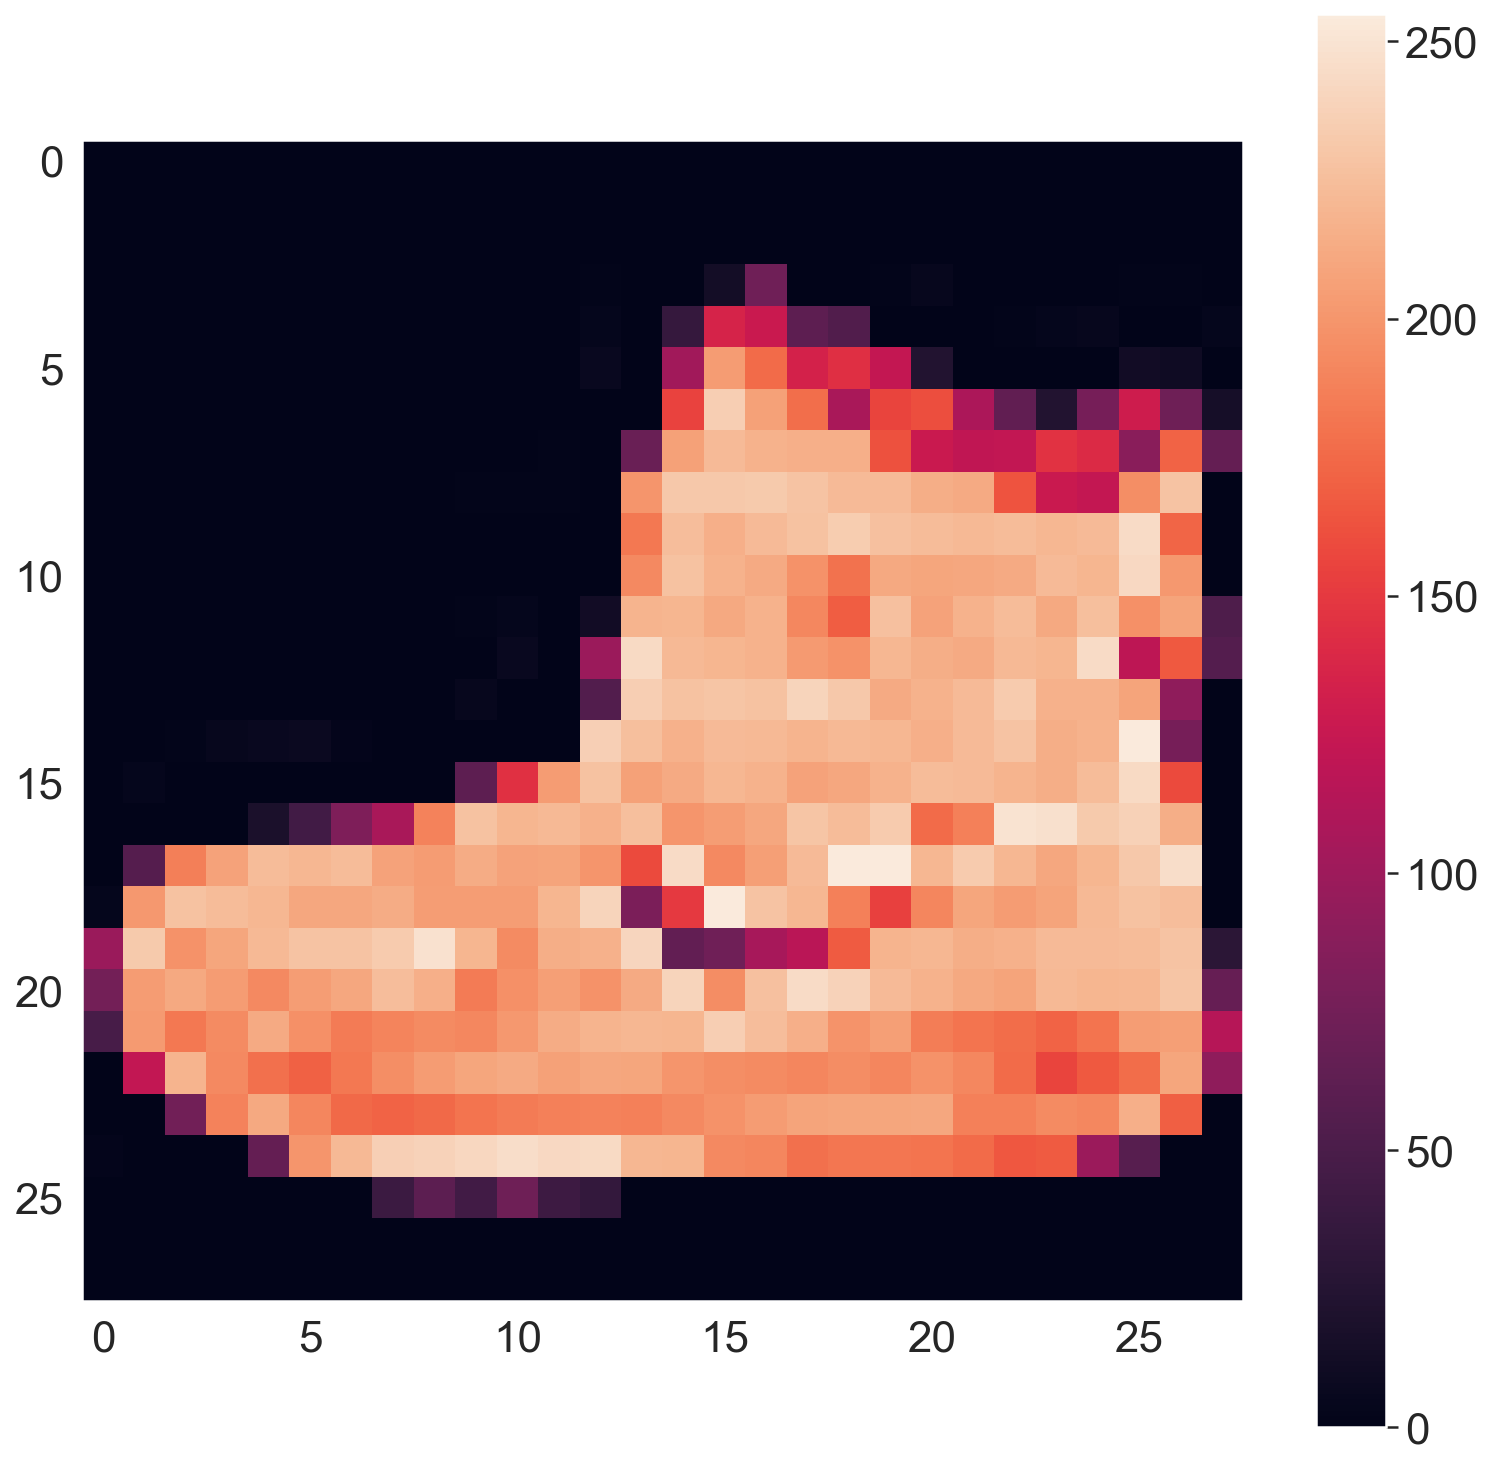

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

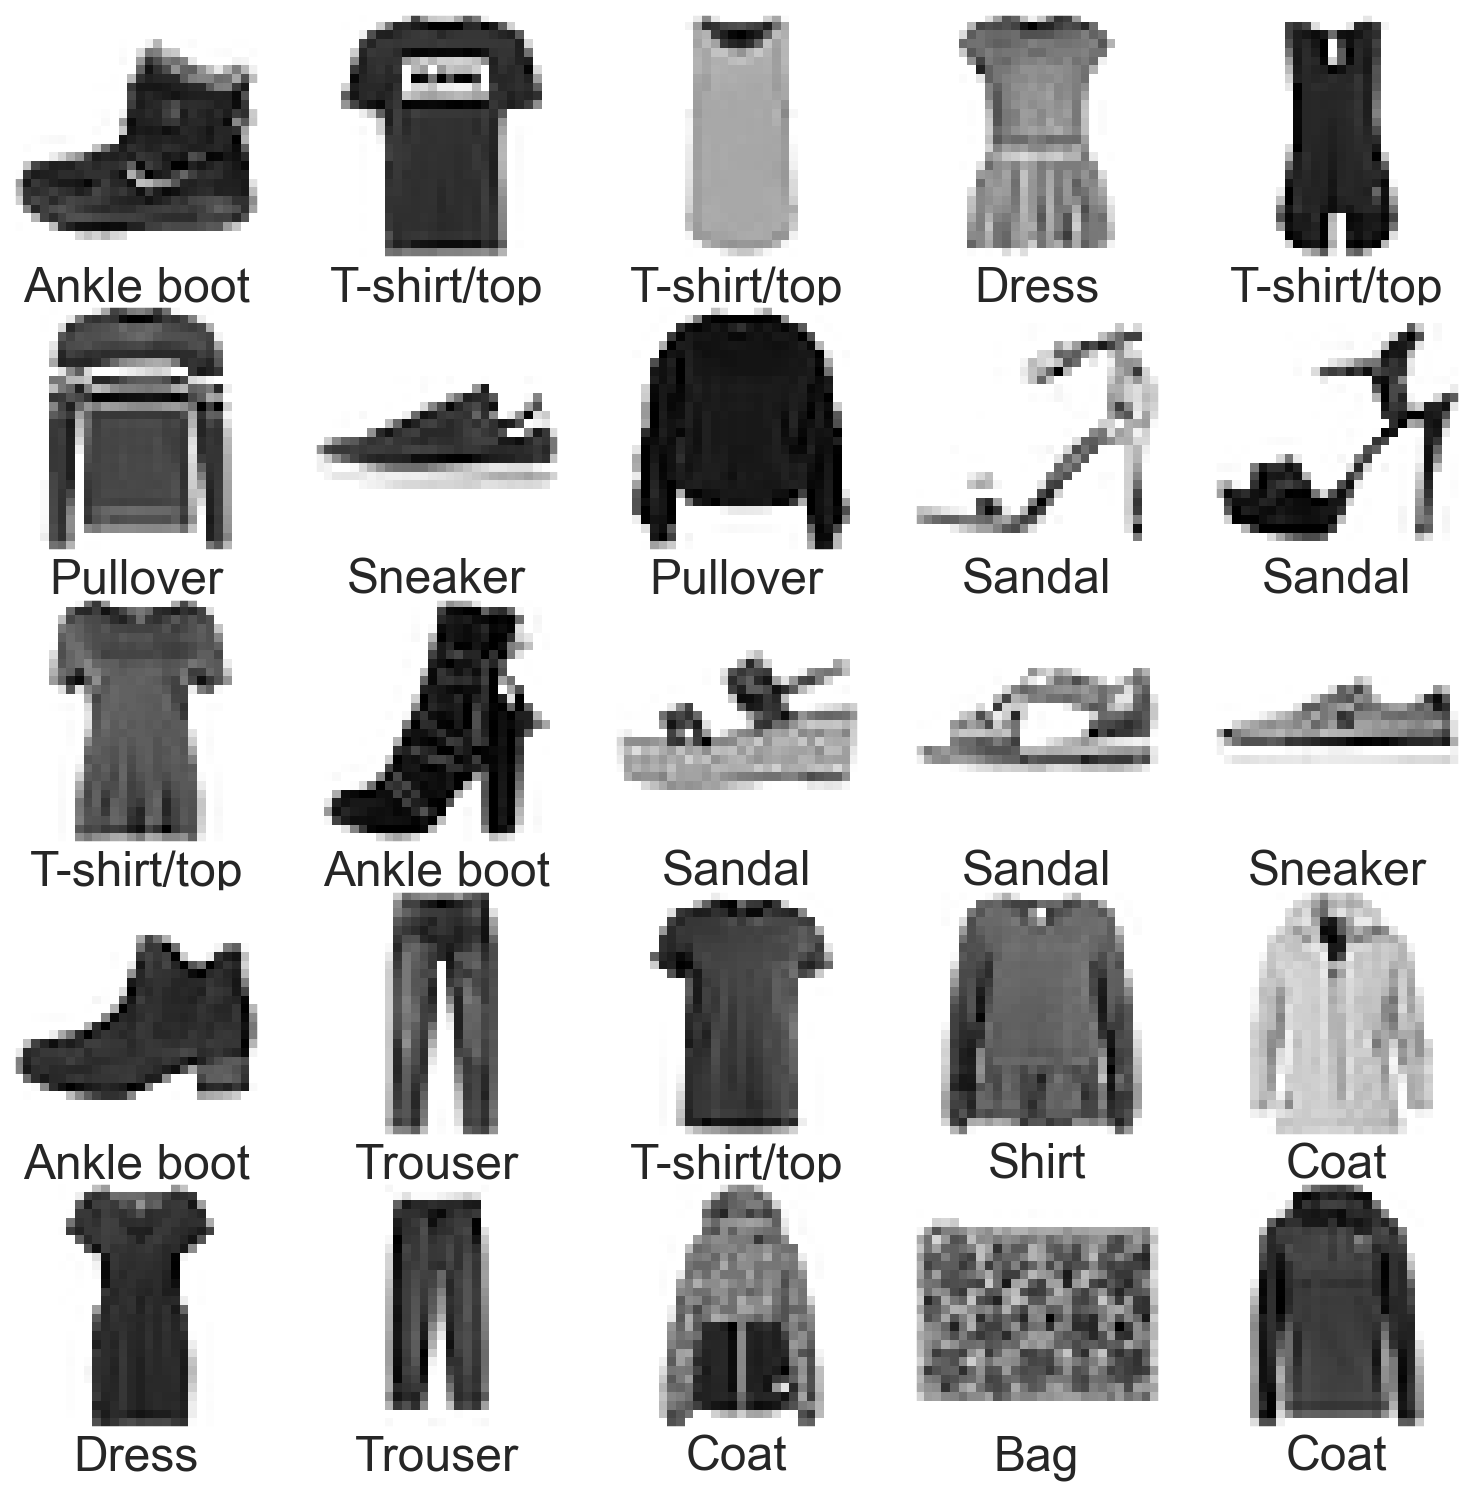

In [7]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='adam', # adam, sgd
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[callback])

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5188 - accuracy: 0.8181 - val_loss: 0.3963 - val_accuracy: 0.8580
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3816 - accuracy: 0.8621 - val_loss: 0.3729 - val_accuracy: 0.8692
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.8756 - val_loss: 0.3590 - val_accuracy: 0.8710
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3175 - accuracy: 0.8831 - val_loss: 0.3651 - val_accuracy: 0.8725
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2998 - accuracy: 0.8902 - val_loss: 0.3653 - val_accuracy: 0.8683
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8954 - val_loss: 0.3369 - val_accuracy: 0.8787
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.9001 - val_loss: 0.3388 - val_accuracy:

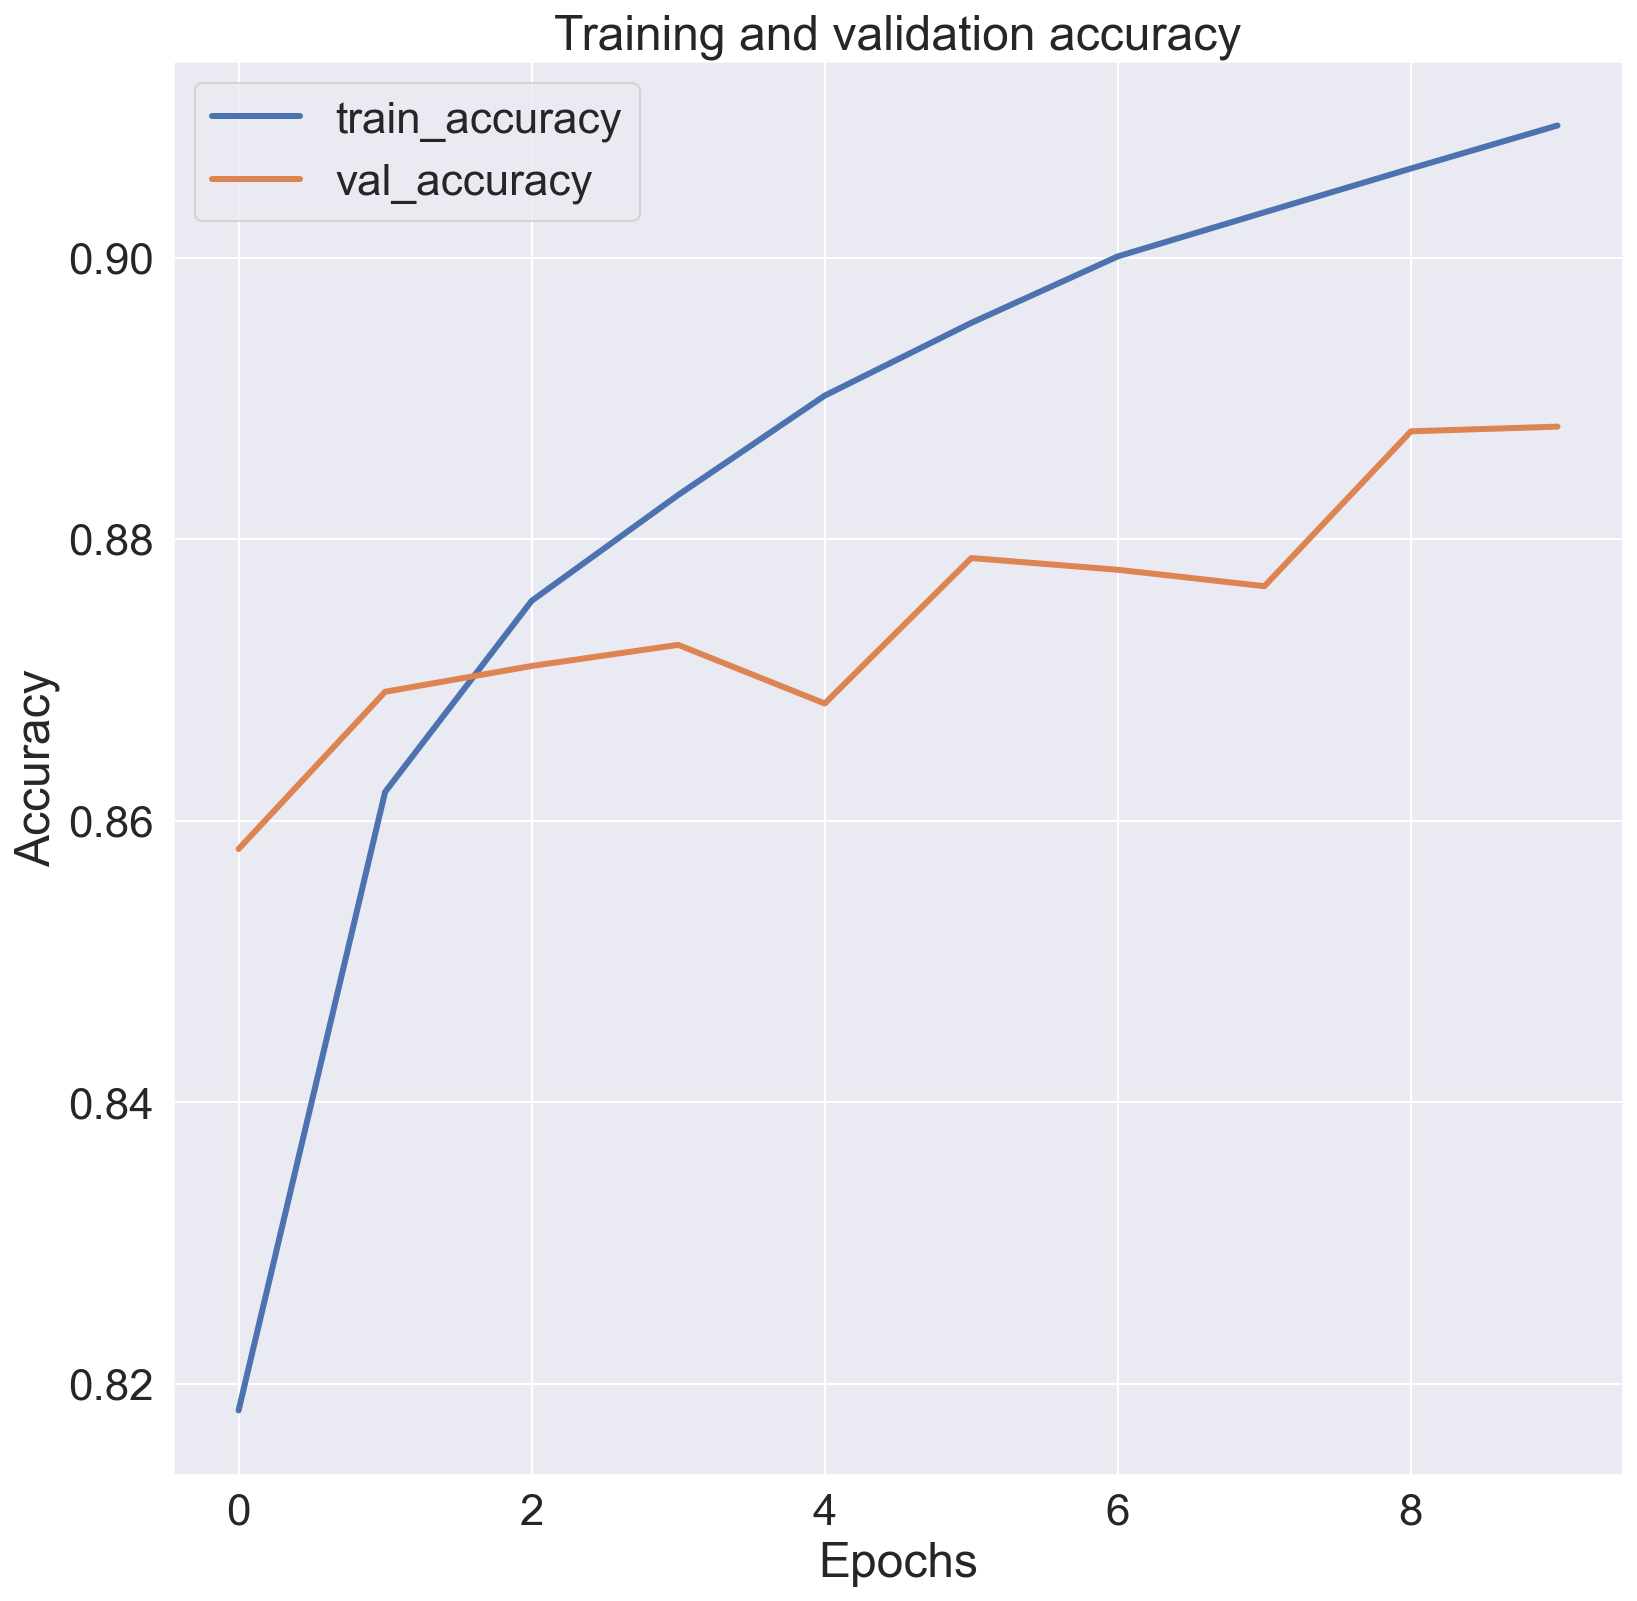

In [11]:
plt.plot(history.history['accuracy'], lw = 3)
plt.plot(history.history['val_accuracy'], lw = 3)
plt.legend(["train_accuracy", 'val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

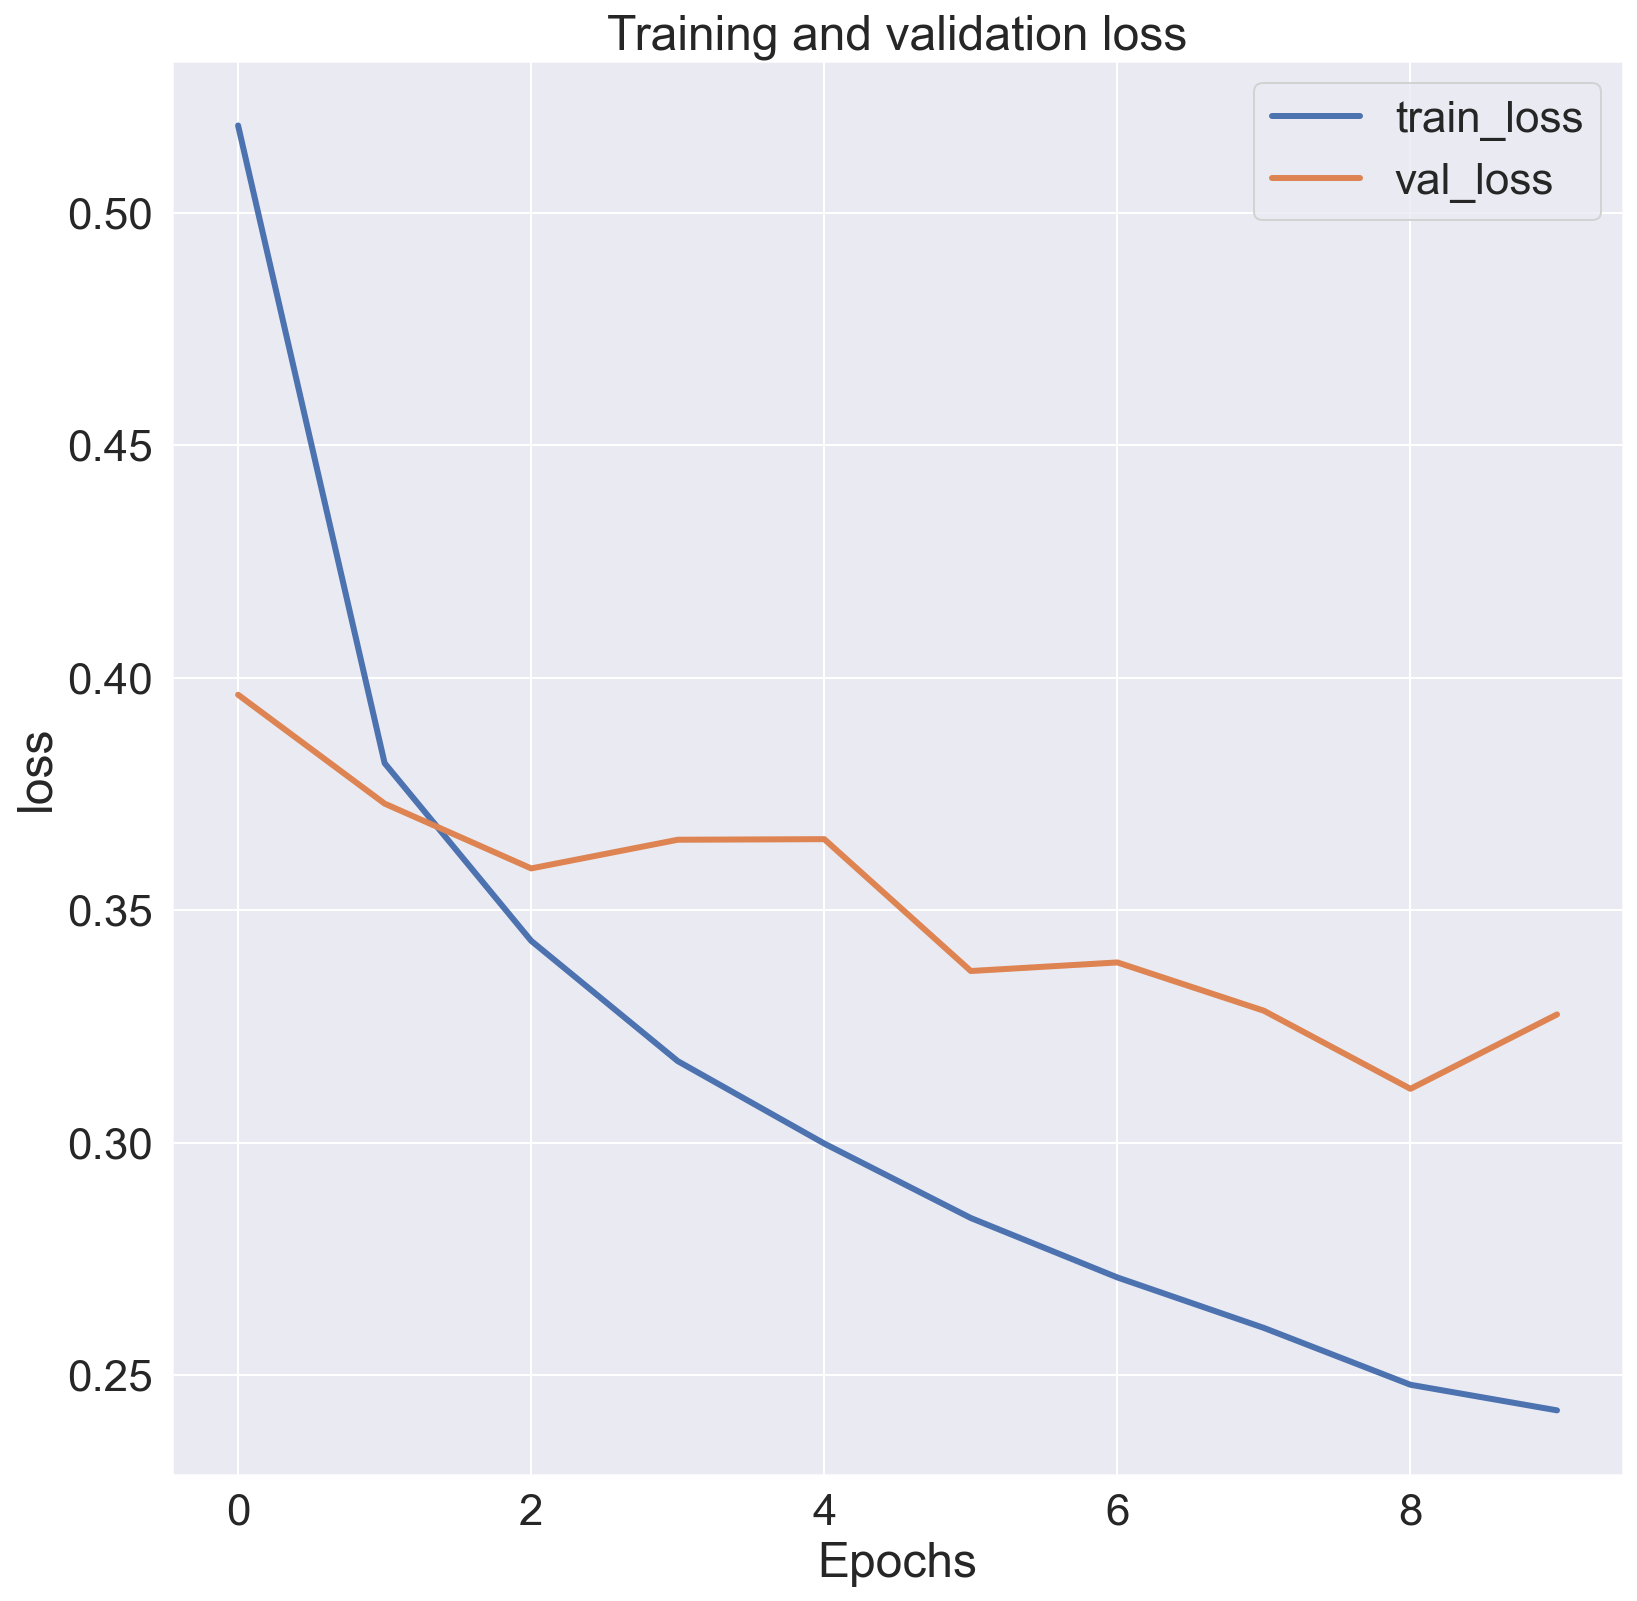

In [12]:
plt.plot(history.history['loss'], lw = 3)
plt.plot(history.history['val_loss'], lw = 3)
plt.legend(["train_loss", 'val_loss'])
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3570 - accuracy: 0.8790 - 307ms/epoch - 980us/step

Test accuracy: 0.8790000081062317


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([3.8070993e-07, 1.7812088e-08, 5.6272658e-08, 1.1453873e-08,
       5.4314810e-08, 3.0258481e-05, 2.0845582e-06, 1.5980411e-02,
       1.4893944e-08, 9.8398674e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
sns.set(font_scale=2)
plt.rcParams["figure.figsize"] = (13, 5)

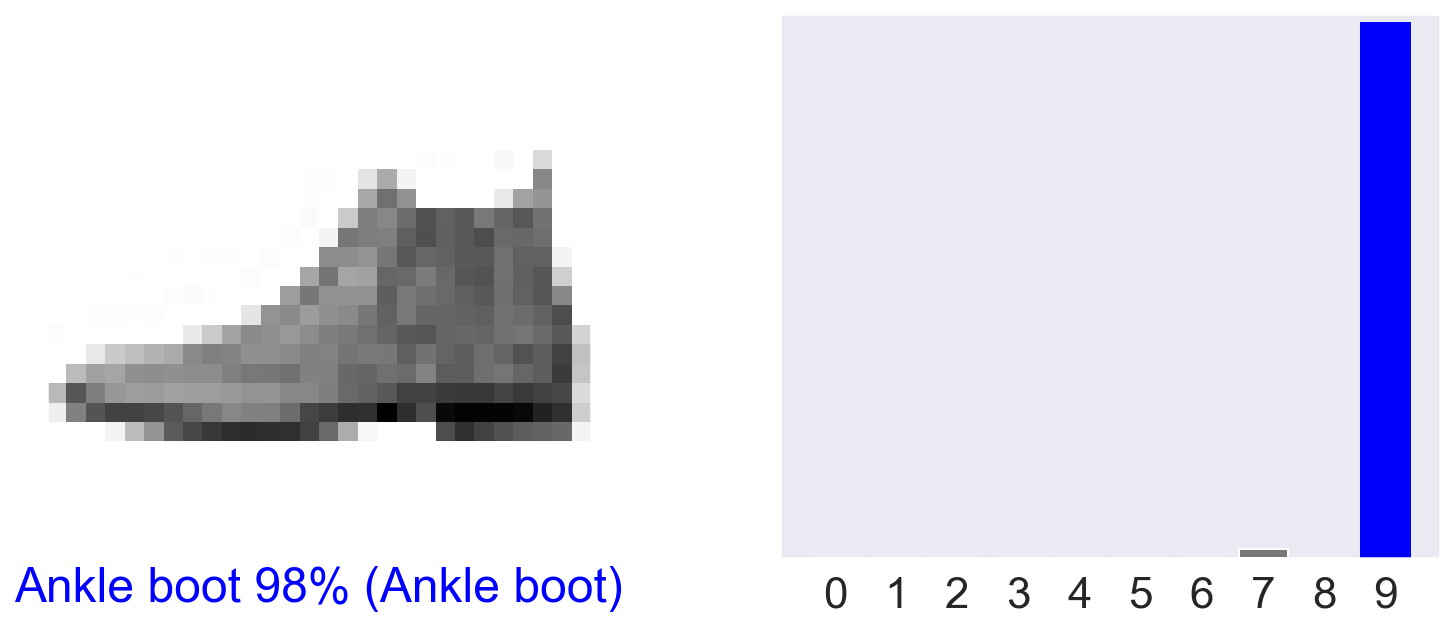

In [21]:
i = 0
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

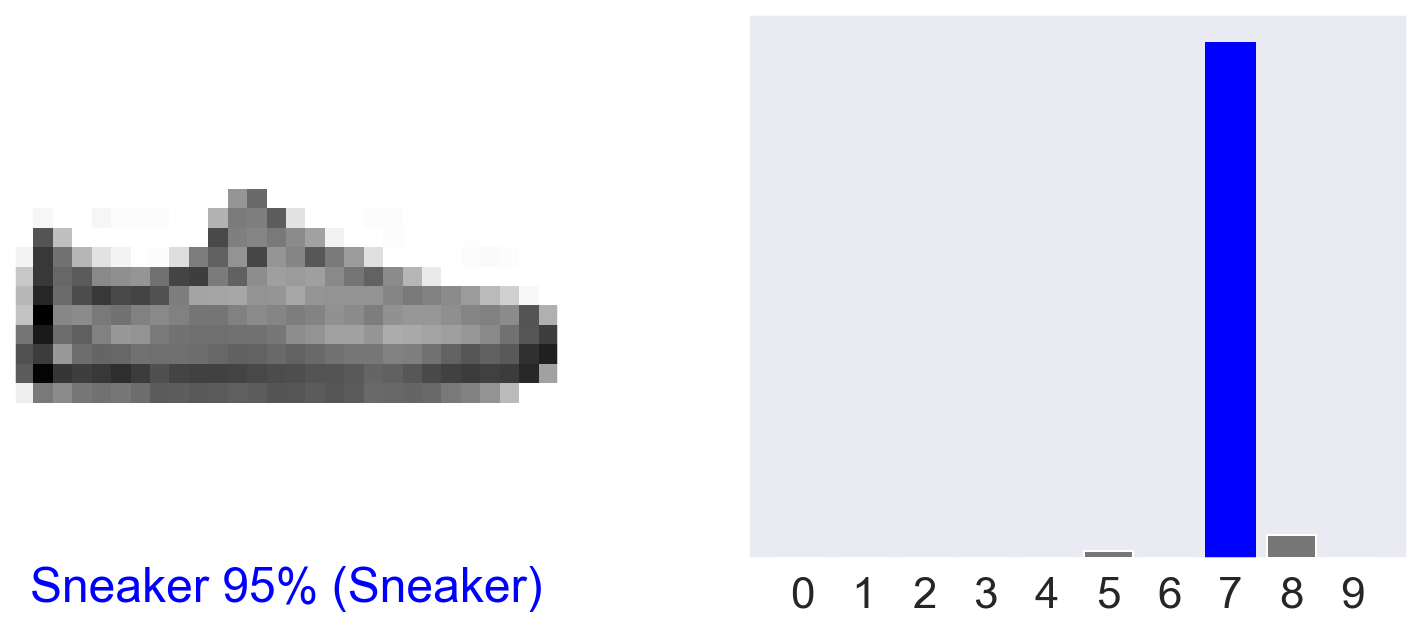

In [22]:
i = 12
# plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

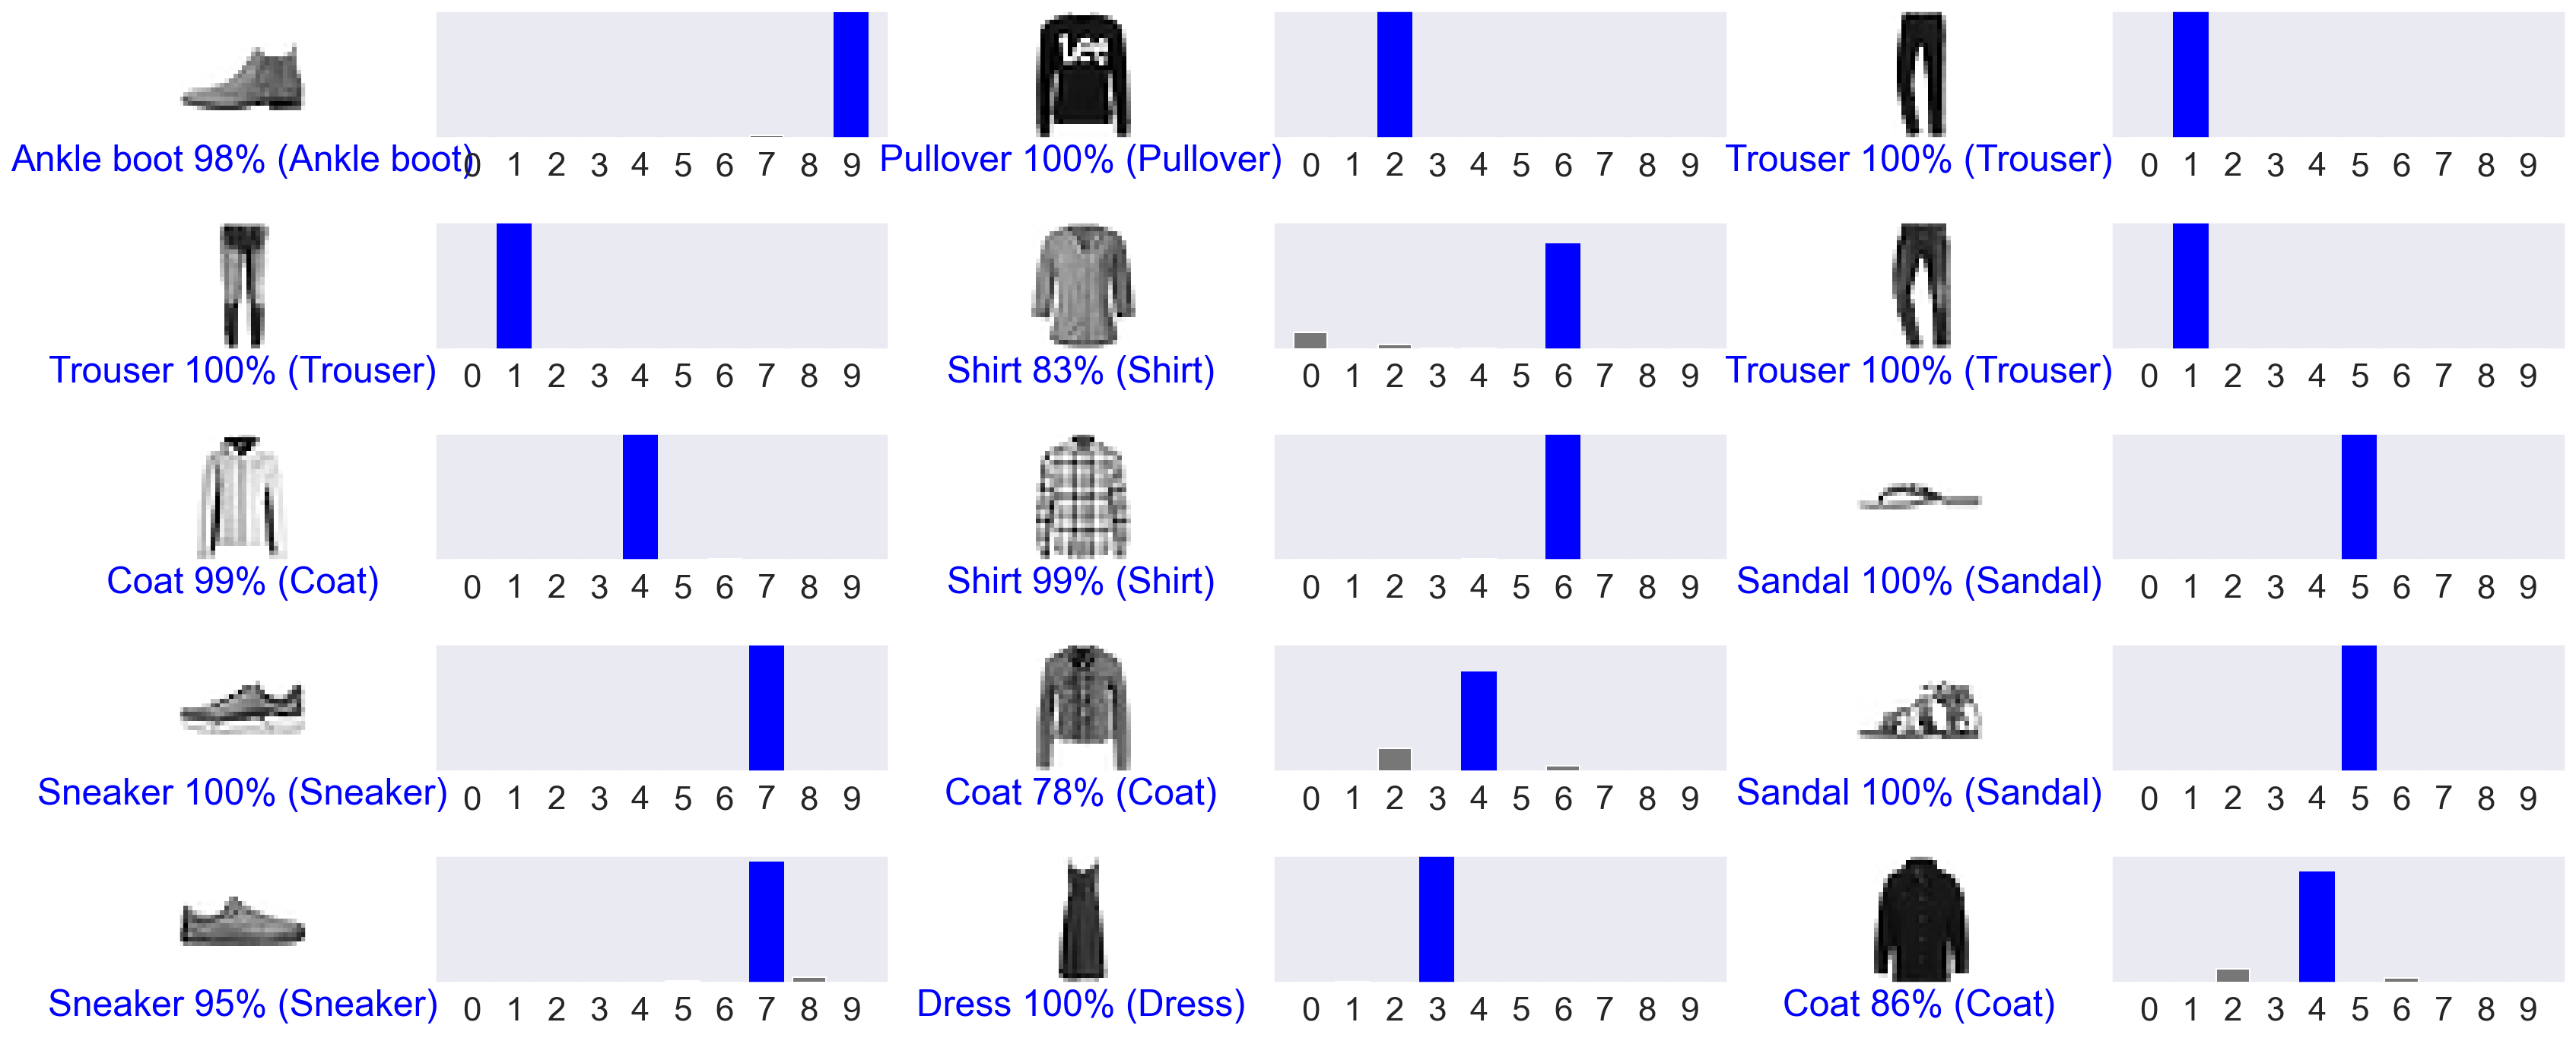

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.9659190e-05 5.4272226e-18 9.9891710e-01 8.0384338e-11 6.6804059e-04
  3.2002419e-16 3.9527871e-04 1.4326625e-16 5.7217084e-13 7.1060009e-18]]


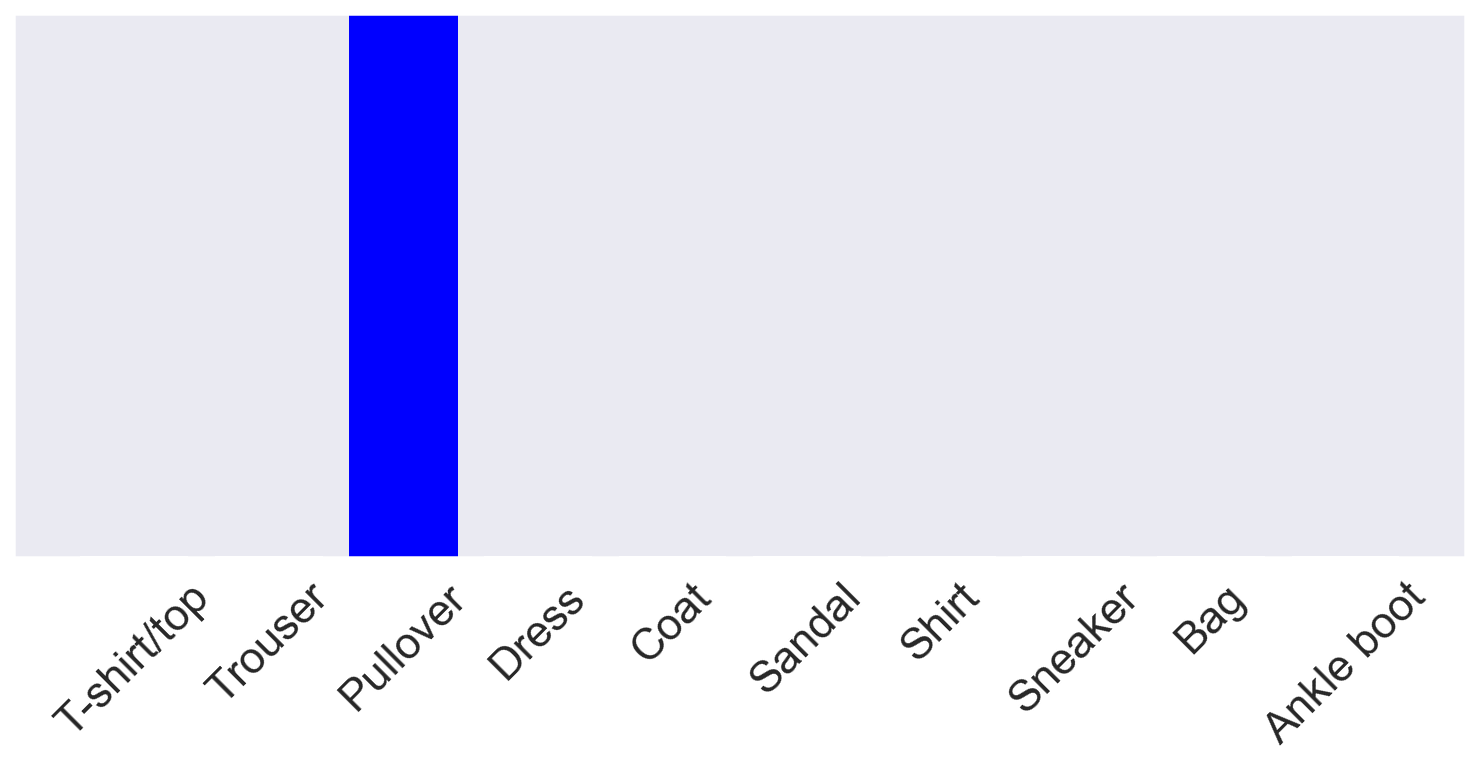

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

2

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)  ))
model.add( keras.layers.MaxPooling2D( (2, 2)) )
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))


In [ ]:
import keras.layers as kl

model.add(kl.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))